In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from dpp.data import load_from_kaggle


/Users/Steffen/Documents/01_Beschäftigung/Weiterbildung/Data Science/StackFuel/Kurse/05_Projekt-Portfoliokurs (DPP)/data_science/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset_link = "shriyashjagtap/esg-and-financial-performance-dataset" # replace with your dataset link from Kaggle 
dataset_link = "maharshipandya/-spotify-tracks-dataset"
destination = "../data/raw"
dataset_name = dataset_link.split("/")[-1]

files = load_from_kaggle(
    dataset_link=dataset_link, 
    destination=destination,
    )

100%|██████████| 8.17M/8.17M [00:01<00:00, 8.06MB/s]

Extracting files...


Loading dataset from /Users/Steffen/.cache/kagglehub/datasets/maharshipandya/-spotify-tracks-dataset/versions/1 to ../data/raw/-spotify-tracks-dataset
Moving file: /Users/Steffen/.cache/kagglehub/datasets/maharshipandya/-spotify-tracks-dataset/versions/1/dataset.csv to /Users/Steffen/Documents/01_Beschäftigung/Weiterbildung/Data Science/StackFuel/Kurse/05_Projekt-Portfoliokurs (DPP)/data_science/notebooks/../data/raw/-spotify-tracks-dataset
Files moved to '../data/raw/-spotify-tracks-dataset' directory.


In [3]:
files

['dataset.csv']

In [4]:
df = pd.read_csv("/".join(["../data/raw/", dataset_name, files[0]]))
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [5]:
display(
    "Shape",
    df.shape,
    "Description",
    df.describe().round(2),
    "Duplicates",
    df.duplicated().sum(),
)


pd.DataFrame(
    {
        "Data Types": df.dtypes,
        "Missing Values": df.isnull().sum(),
        "Unique Values": df.nunique(),
        "Sample Values": [df[col].sample(3).tolist() for col in df.columns]
    })


'Shape'

(114000, 21)

'Description'

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00
mean,56999.50,33.24,228029.15,0.57,0.64,5.31,-8.26,0.64,0.08,0.31,0.16,0.21,0.47,122.15,3.90
std,32909.11,22.31,107297.71,0.17,0.25,3.56,5.03,0.48,0.11,0.33,0.31,0.19,0.26,29.98,0.43
min,0.00,0.00,0.00,0.00,0.00,0.00,-49.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,28499.75,17.00,174066.00,0.46,0.47,2.00,-10.01,0.00,0.04,0.02,0.00,0.10,0.26,99.22,4.00
50%,56999.50,35.00,212906.00,0.58,0.68,5.00,-7.00,1.00,0.05,0.17,0.00,0.13,0.46,122.02,4.00
75%,85499.25,50.00,261506.00,0.70,0.85,8.00,-5.00,1.00,0.08,0.60,0.05,0.27,0.68,140.07,4.00
max,113999.00,100.00,5237295.00,0.98,1.00,11.00,4.53,1.00,0.96,1.00,1.00,1.00,1.00,243.37,5.00


'Duplicates'

np.int64(0)

,Data Types,Missing Values,Unique Values,Sample Values
Unnamed: 0,int64,0,114000,"[51372, 105354, 60834]"
track_id,object,0,89741,"[1gXHjHo65lQ8yM0Qdaghgm, 5V1ohWM2iv4w8TUfA1LZG..."
artists,object,1,31437,"[D-Block & S-te-Fan, Feid;Sky Rompiendo, Nomad..."
album_name,object,1,46589,"[SEIKO STORY〜80's HITS COLLECTION〜, Body & Sou..."
track_name,object,1,73608,"[Surf Slide Minimal - Club Edit, 燃えるごみの日, You ..."
popularity,int64,0,101,"[40, 64, 56]"
duration_ms,int64,0,50697,"[246816, 312226, 412650]"
explicit,bool,0,2,"[False, False, False]"
danceability,float64,0,1174,"[0.843, 0.691, 0.406]"
energy,float64,0,2083,"[0.99, 0.737, 0.873]"


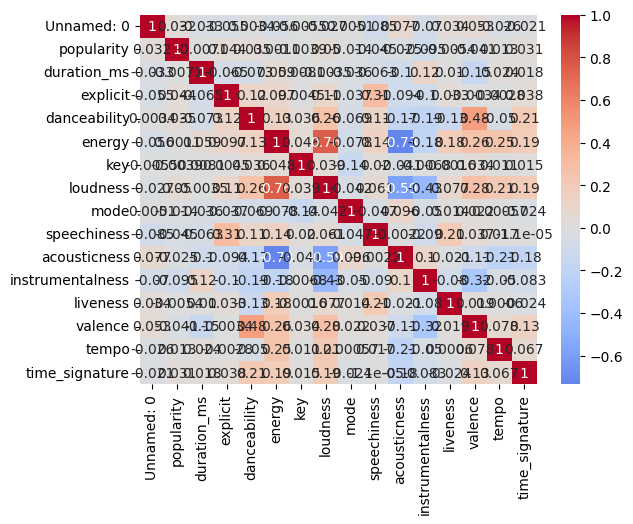

In [6]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0);